# TASK1: PREDICTION USING SUPERVISED ML 

Predict the percentage of a student based on the number of study hours. 

###### Importing Necessary Libraries

In [1]:
# data preprocessing
import pandas as pd

# linear algebra
import numpy as np


# data visuualization
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
import warnings
warnings.filterwarnings('ignore')

###### Listing the values

In [3]:
Hours = (2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5, 3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8)
Scores = (21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30, 24, 67, 69, 30, 54, 35, 76, 86)

###### Creating a DataFrame

In [4]:
# create a dictionary
data = {"Hours": Hours, "Scores": Scores}
df = pd.DataFrame(data)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


###### Understanding the structure of the dataframe

In [5]:
df.shape

(25, 2)

There are 25 rows and 2 columns in the dataset.

###### Viewing the data

In [6]:
# View the first few rows of the DataFrame
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
# View the last few rows of the DataFrame.
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


###### Summary of the dataframe

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


* Both are numerical varibles.
* Number of non values in each column is obtained and hence the presence of null values if can be detected.
* Provides an estimate of memory usage of the dataframe. Here the memory usage is approximately 528 bytes.

###### Summary Statistics

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


###### Correlation between the variables

In [10]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


There is a strong positive correlation between Hours and Scores. 

###### Scatter Plot

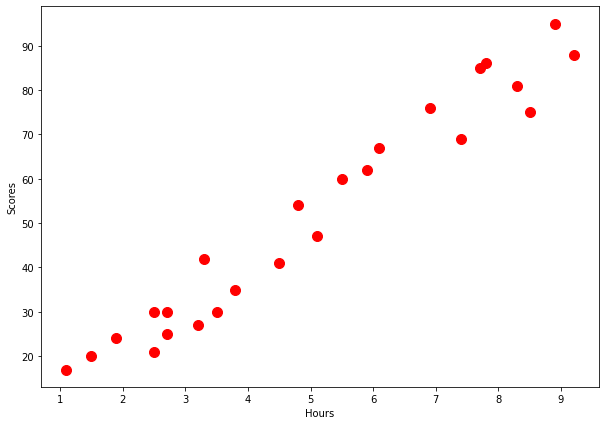

In [11]:
plt.figure(figsize=(10,7))
plt.scatter(df['Hours'], df['Scores'], s= 100, marker = 'o', color='red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

###### Determining target variable and feature variable

In [12]:
# X is the feature variable
X = df['Hours']

# y is the target variable
y = df['Scores']

###### Splitting into train and test data

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=100)

In [14]:
X_train = X_train[:,np.newaxis]

In [15]:
X_test = X_test[:, np.newaxis]

In [16]:
# importing linear regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [17]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred_linear = linear_model.predict(X_test)

In [19]:
y_pred_df = pd.DataFrame({'Actual_y': y_test,'Predicted_y':y_pred_linear })
y_pred_df

,Actual_y,Predicted_y
9,25,28.148771
22,35,39.007657
13,42,34.071800
11,62,59.738257
5,20,16.302714
19,69,74.545829
23,76,69.609972
21,54,48.879371


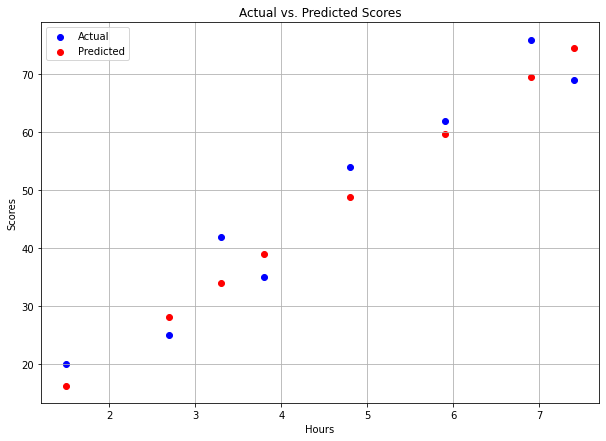

In [20]:
plt.figure(figsize=(10, 7))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_linear, color='red', label='Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.title('Actual vs. Predicted Scores')
plt.grid(True)
plt.show()

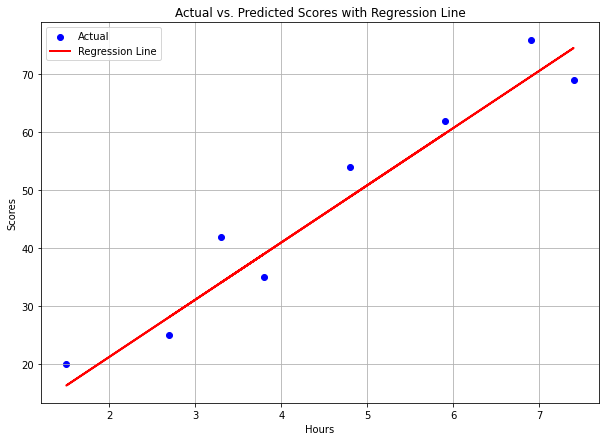

In [21]:
plt.figure(figsize=(10, 7))
plt.scatter(X_test, y_test, color='blue', label='Actual')
# Plot the regression line
plt.plot(X_test, y_pred_linear, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.title('Actual vs. Predicted Scores with Regression Line')
plt.grid(True)
plt.show()

###### Evaluation of Linear Regression model

In [22]:
# Calculate the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred_linear,squared=False)
MSE   

5.0673878451608445

Mean Squared Error (MSE) calculates the average of the squared differences between predicted values and actual values. Smaller MSE values indicate better model performance.

In [24]:
# Calculate the Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)
RMSE

2.2510859257613522

Root Mean Squared Error (RMSE) is the square root of MSE.

In [23]:
# Calculate the Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred_linear)
MAE

4.762517892332275

Mean Absolute Error (MAE) measures the average absolute difference between the actual values and the predicted values. Lower MAE values indicate better model performance.

In [25]:
# Calculate the coefficient of determination (R-squared)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_linear)
print("R-squared:", r2)

R-squared: 0.9309458862687437


R-squared measures the proportion of the variance in the dependent variable (target) that is explained by the independent variables (features) in your model. It ranges from 0 to 1, where 0 indicates that the model does not explain any variance, and 1 indicates a perfect fit. A higher R² indicates a better fit of the model to the data. Here, 93% of variations in target variable is explained by the independent variables.